In [2]:
!pip install ucimlrepo

In [3]:
# Импортируем библиотеки

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import scipy.stats as stats
from mlxtend.plotting import plot_decision_regions
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
from ucimlrepo import fetch_ucirepo

##Настройка##

In [4]:
pd.set_option("display.max_columns", None)

##Загрузка данных##

In [5]:
data = fetch_ucirepo(id=891)

df = data['data']['features'].head(5000)
df['target'] = data.data.targets.head(5000)

df.head()

<ipython-input-5-ec5360ac9f09>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = data.data.targets.head(5000)


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,target
0,1,1,1,40,1,0,0,0,0,1,0,1,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,0,0,0,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,0,0,1,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,1,1,1,0,1,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,1,0,1,0,2,3,0,0,0,11,5,4,0


#Датасет "CDC Diabetes Health Indicators"#

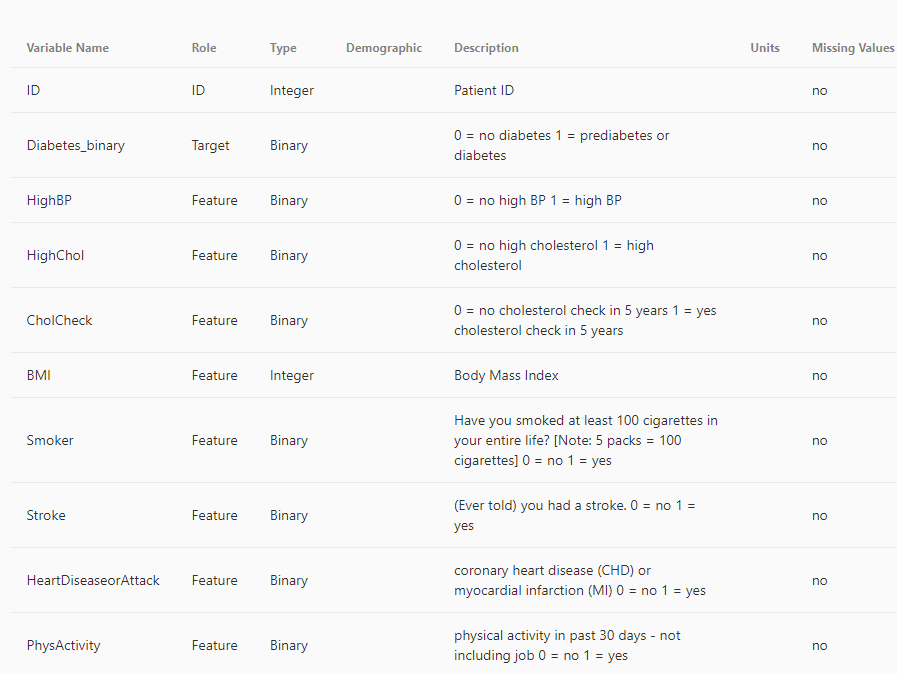

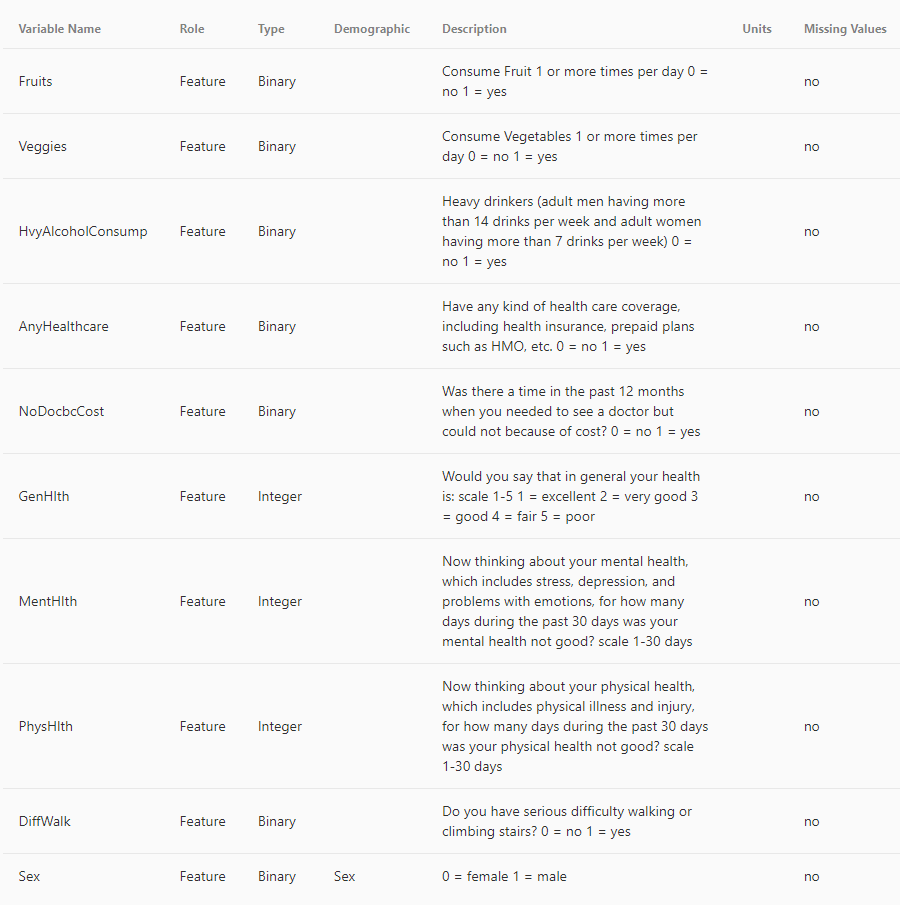

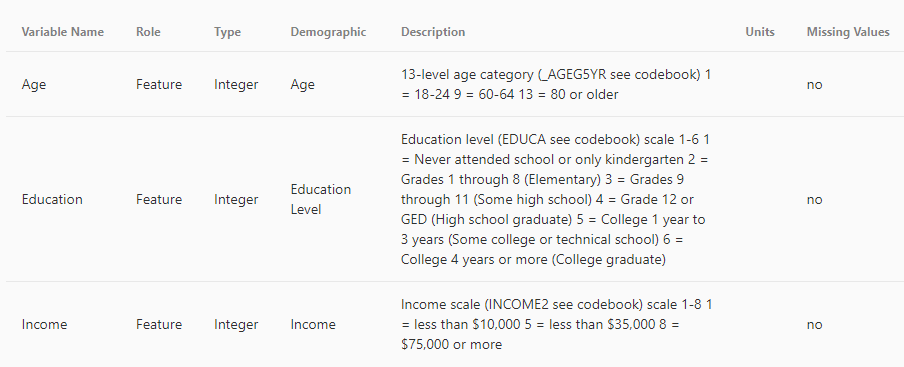

##Анализ данных##

In [6]:
df.shape

(5000, 22)

In [7]:
df.head(10)

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,target
0,1,1,1,40,1,0,0,0,0,1,0,1,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,0,0,0,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,0,0,1,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,1,1,1,0,1,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,1,0,1,0,2,3,0,0,0,11,5,4,0
5,1,1,1,25,1,0,0,1,1,1,0,1,0,2,0,2,0,1,10,6,8,0
6,1,0,1,30,1,0,0,0,0,0,0,1,0,3,0,14,0,0,9,6,7,0
7,1,1,1,25,1,0,0,1,0,1,0,1,0,3,0,0,1,0,11,4,4,0
8,1,1,1,30,1,0,1,0,1,1,0,1,0,5,30,30,1,0,9,5,1,1
9,0,0,1,24,0,0,0,0,0,1,0,1,0,2,0,0,0,1,8,4,3,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   HighBP                5000 non-null   int64
 1   HighChol              5000 non-null   int64
 2   CholCheck             5000 non-null   int64
 3   BMI                   5000 non-null   int64
 4   Smoker                5000 non-null   int64
 5   Stroke                5000 non-null   int64
 6   HeartDiseaseorAttack  5000 non-null   int64
 7   PhysActivity          5000 non-null   int64
 8   Fruits                5000 non-null   int64
 9   Veggies               5000 non-null   int64
 10  HvyAlcoholConsump     5000 non-null   int64
 11  AnyHealthcare         5000 non-null   int64
 12  NoDocbcCost           5000 non-null   int64
 13  GenHlth               5000 non-null   int64
 14  MentHlth              5000 non-null   int64
 15  PhysHlth              5000 non-null   int64
 16  DiffWa

In [9]:
df['target'].unique()

array([0, 1])

In [10]:
df.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,target
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.507200,0.465800,0.967000,29.143200,0.448000,0.053800,0.105200,0.699200,0.555400,0.77420,0.049200,0.934800,0.122200,2.710000,3.969600,5.186400,0.230400,0.410400,7.871600,4.881800,5.665800,0.182800
std,0.499998,0.498879,0.178654,6.507132,0.497338,0.225645,0.306842,0.458652,0.496971,0.41815,0.216307,0.246903,0.327549,1.131086,8.290984,9.592438,0.421131,0.491956,2.973429,1.027833,2.200427,0.386541
min,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,4.000000,0.000000
50%,1.000000,0.000000,1.000000,28.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.00000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,6.000000,0.000000
75%,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.00000,0.000000,1.000000,0.000000,3.000000,3.000000,5.000000,0.000000,1.000000,10.000000,6.000000,8.000000,0.000000
max,1.000000,1.000000,1.000000,63.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,1.000000


In [11]:
# Проверим количество строк, которое принадлежит каждому классу:

df['target'].value_counts()

,count
target,
0,4086
1,914


##Визуализация данных##

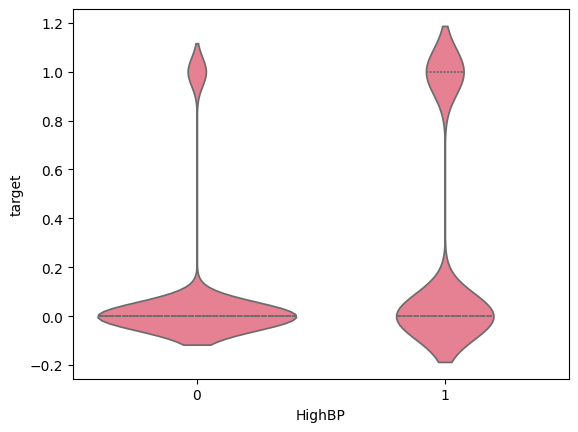

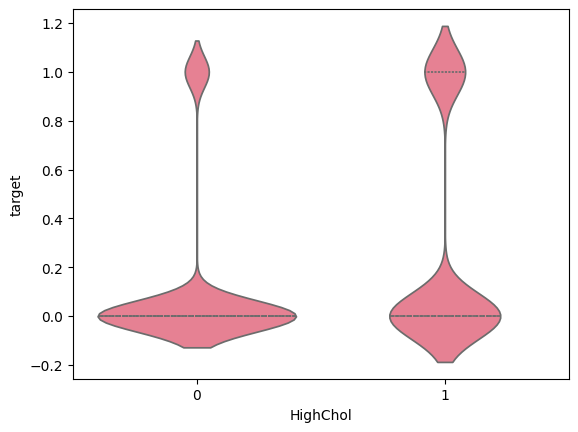

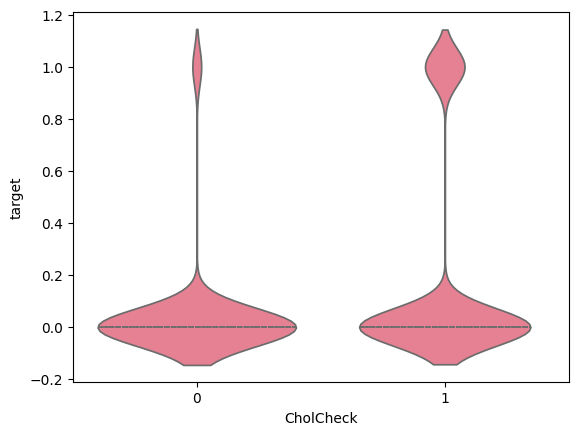

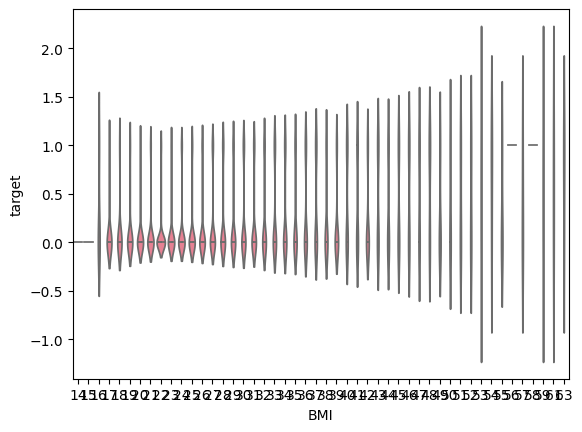

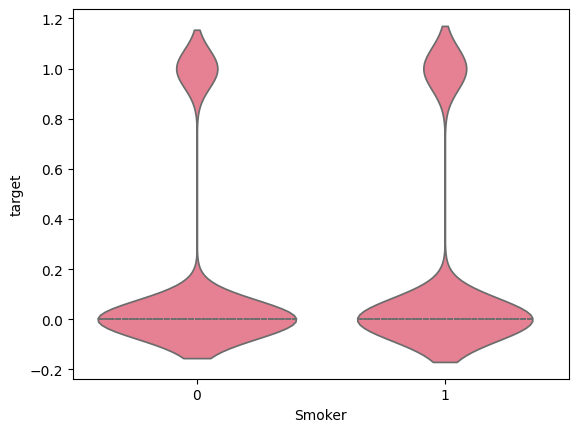

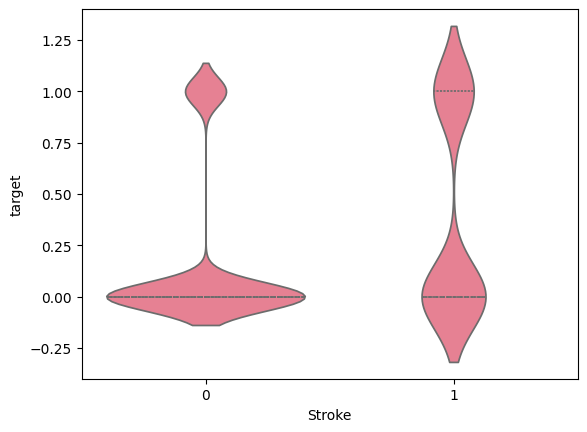

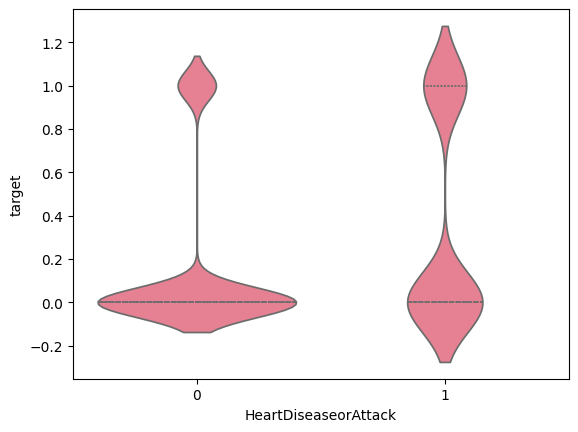

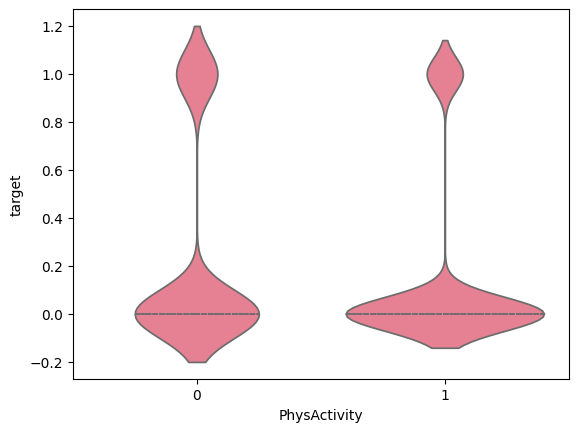

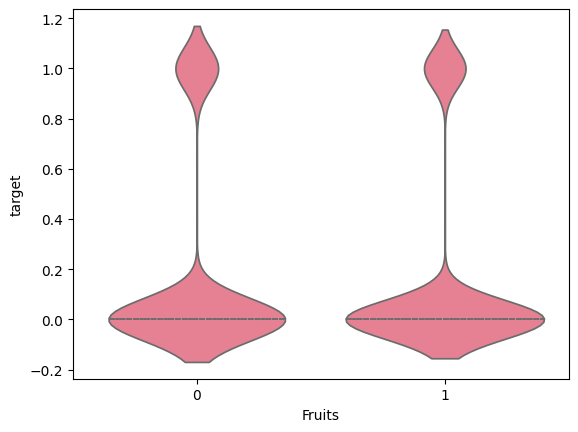

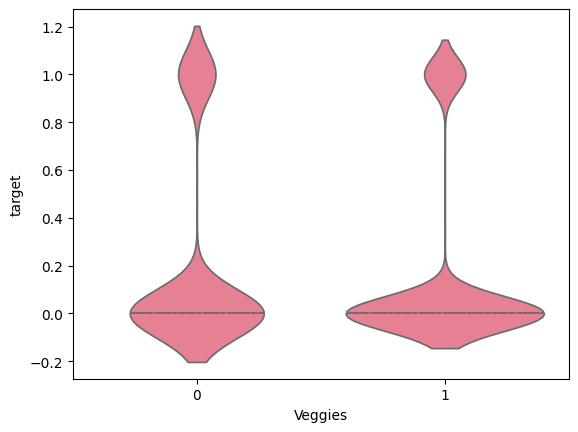

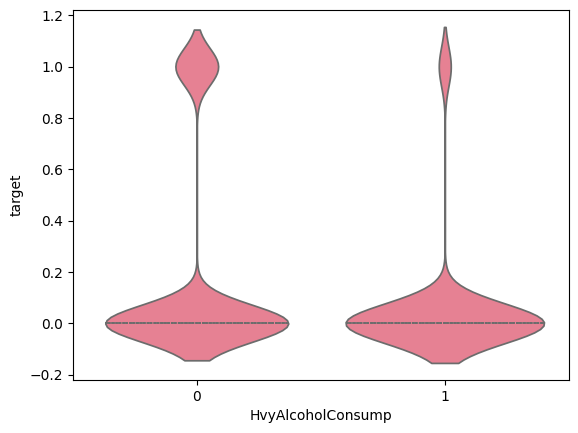

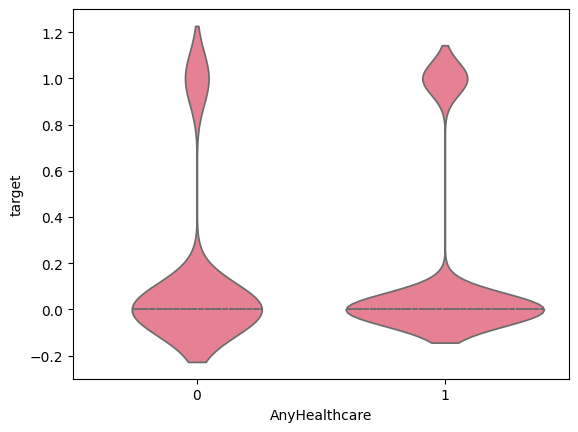

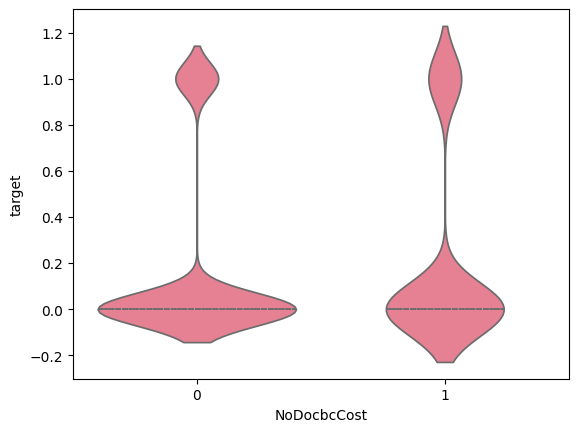

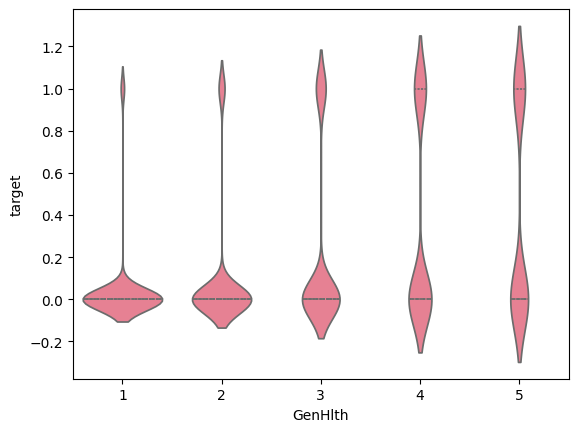

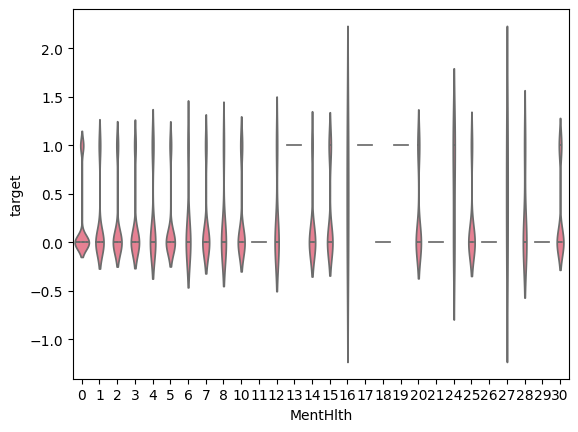

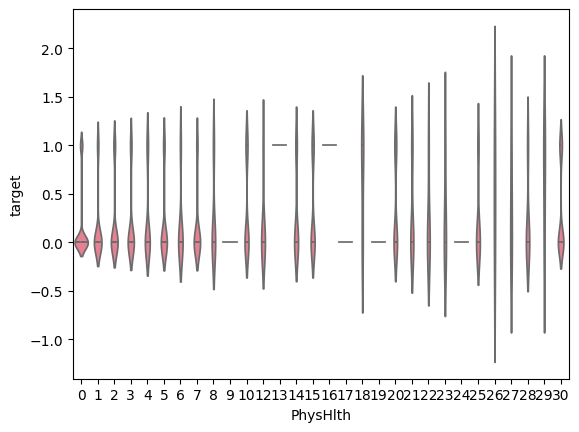

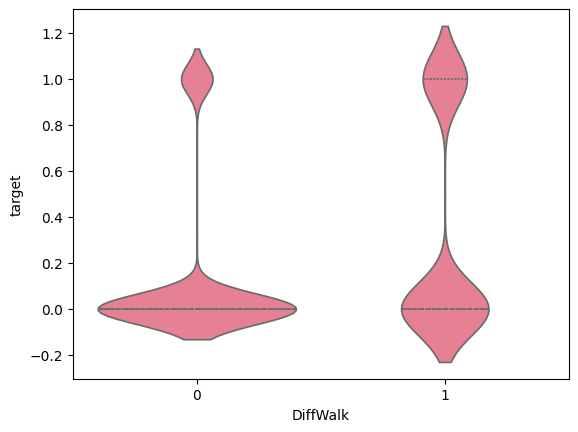

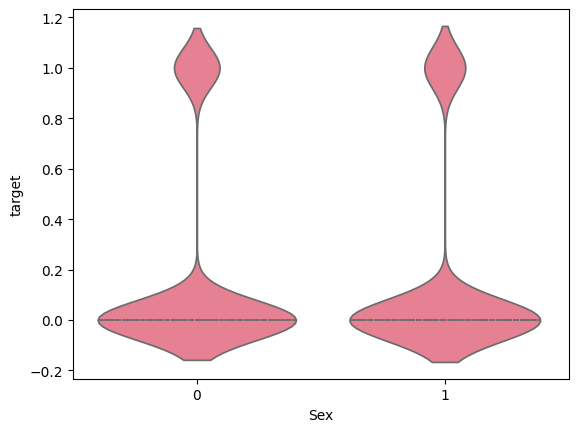

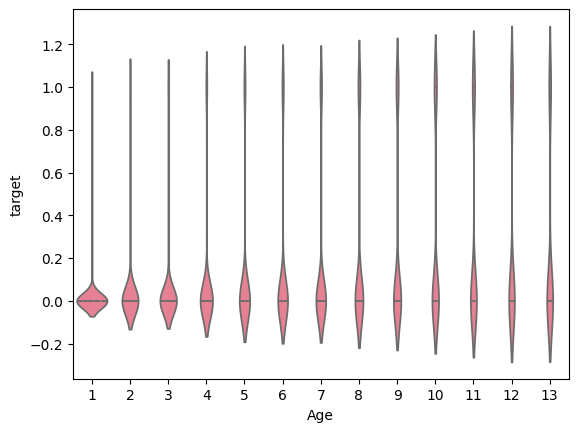

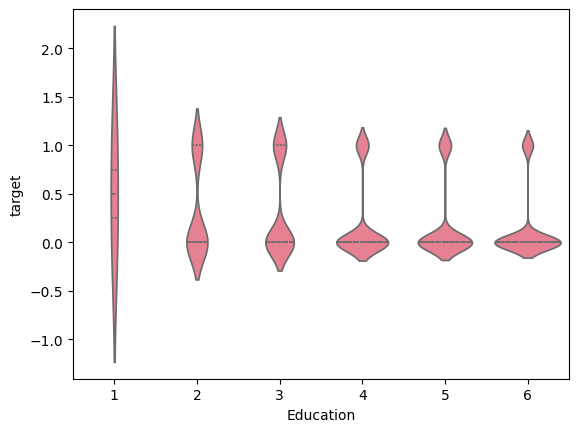

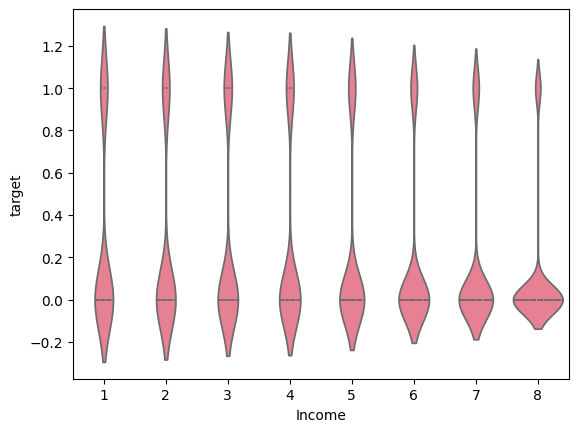

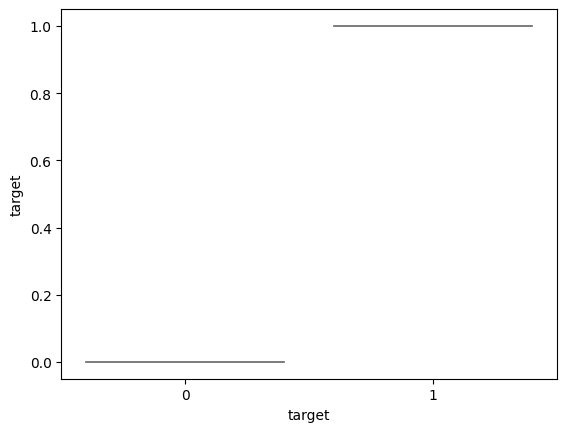

In [12]:
# Скрипичный график.
# Используется для проверки сравнения распределения переменных:

for col in df.columns:
  sns.violinplot(y='target', x=col, data=df, inner='quartile')
  plt.show()

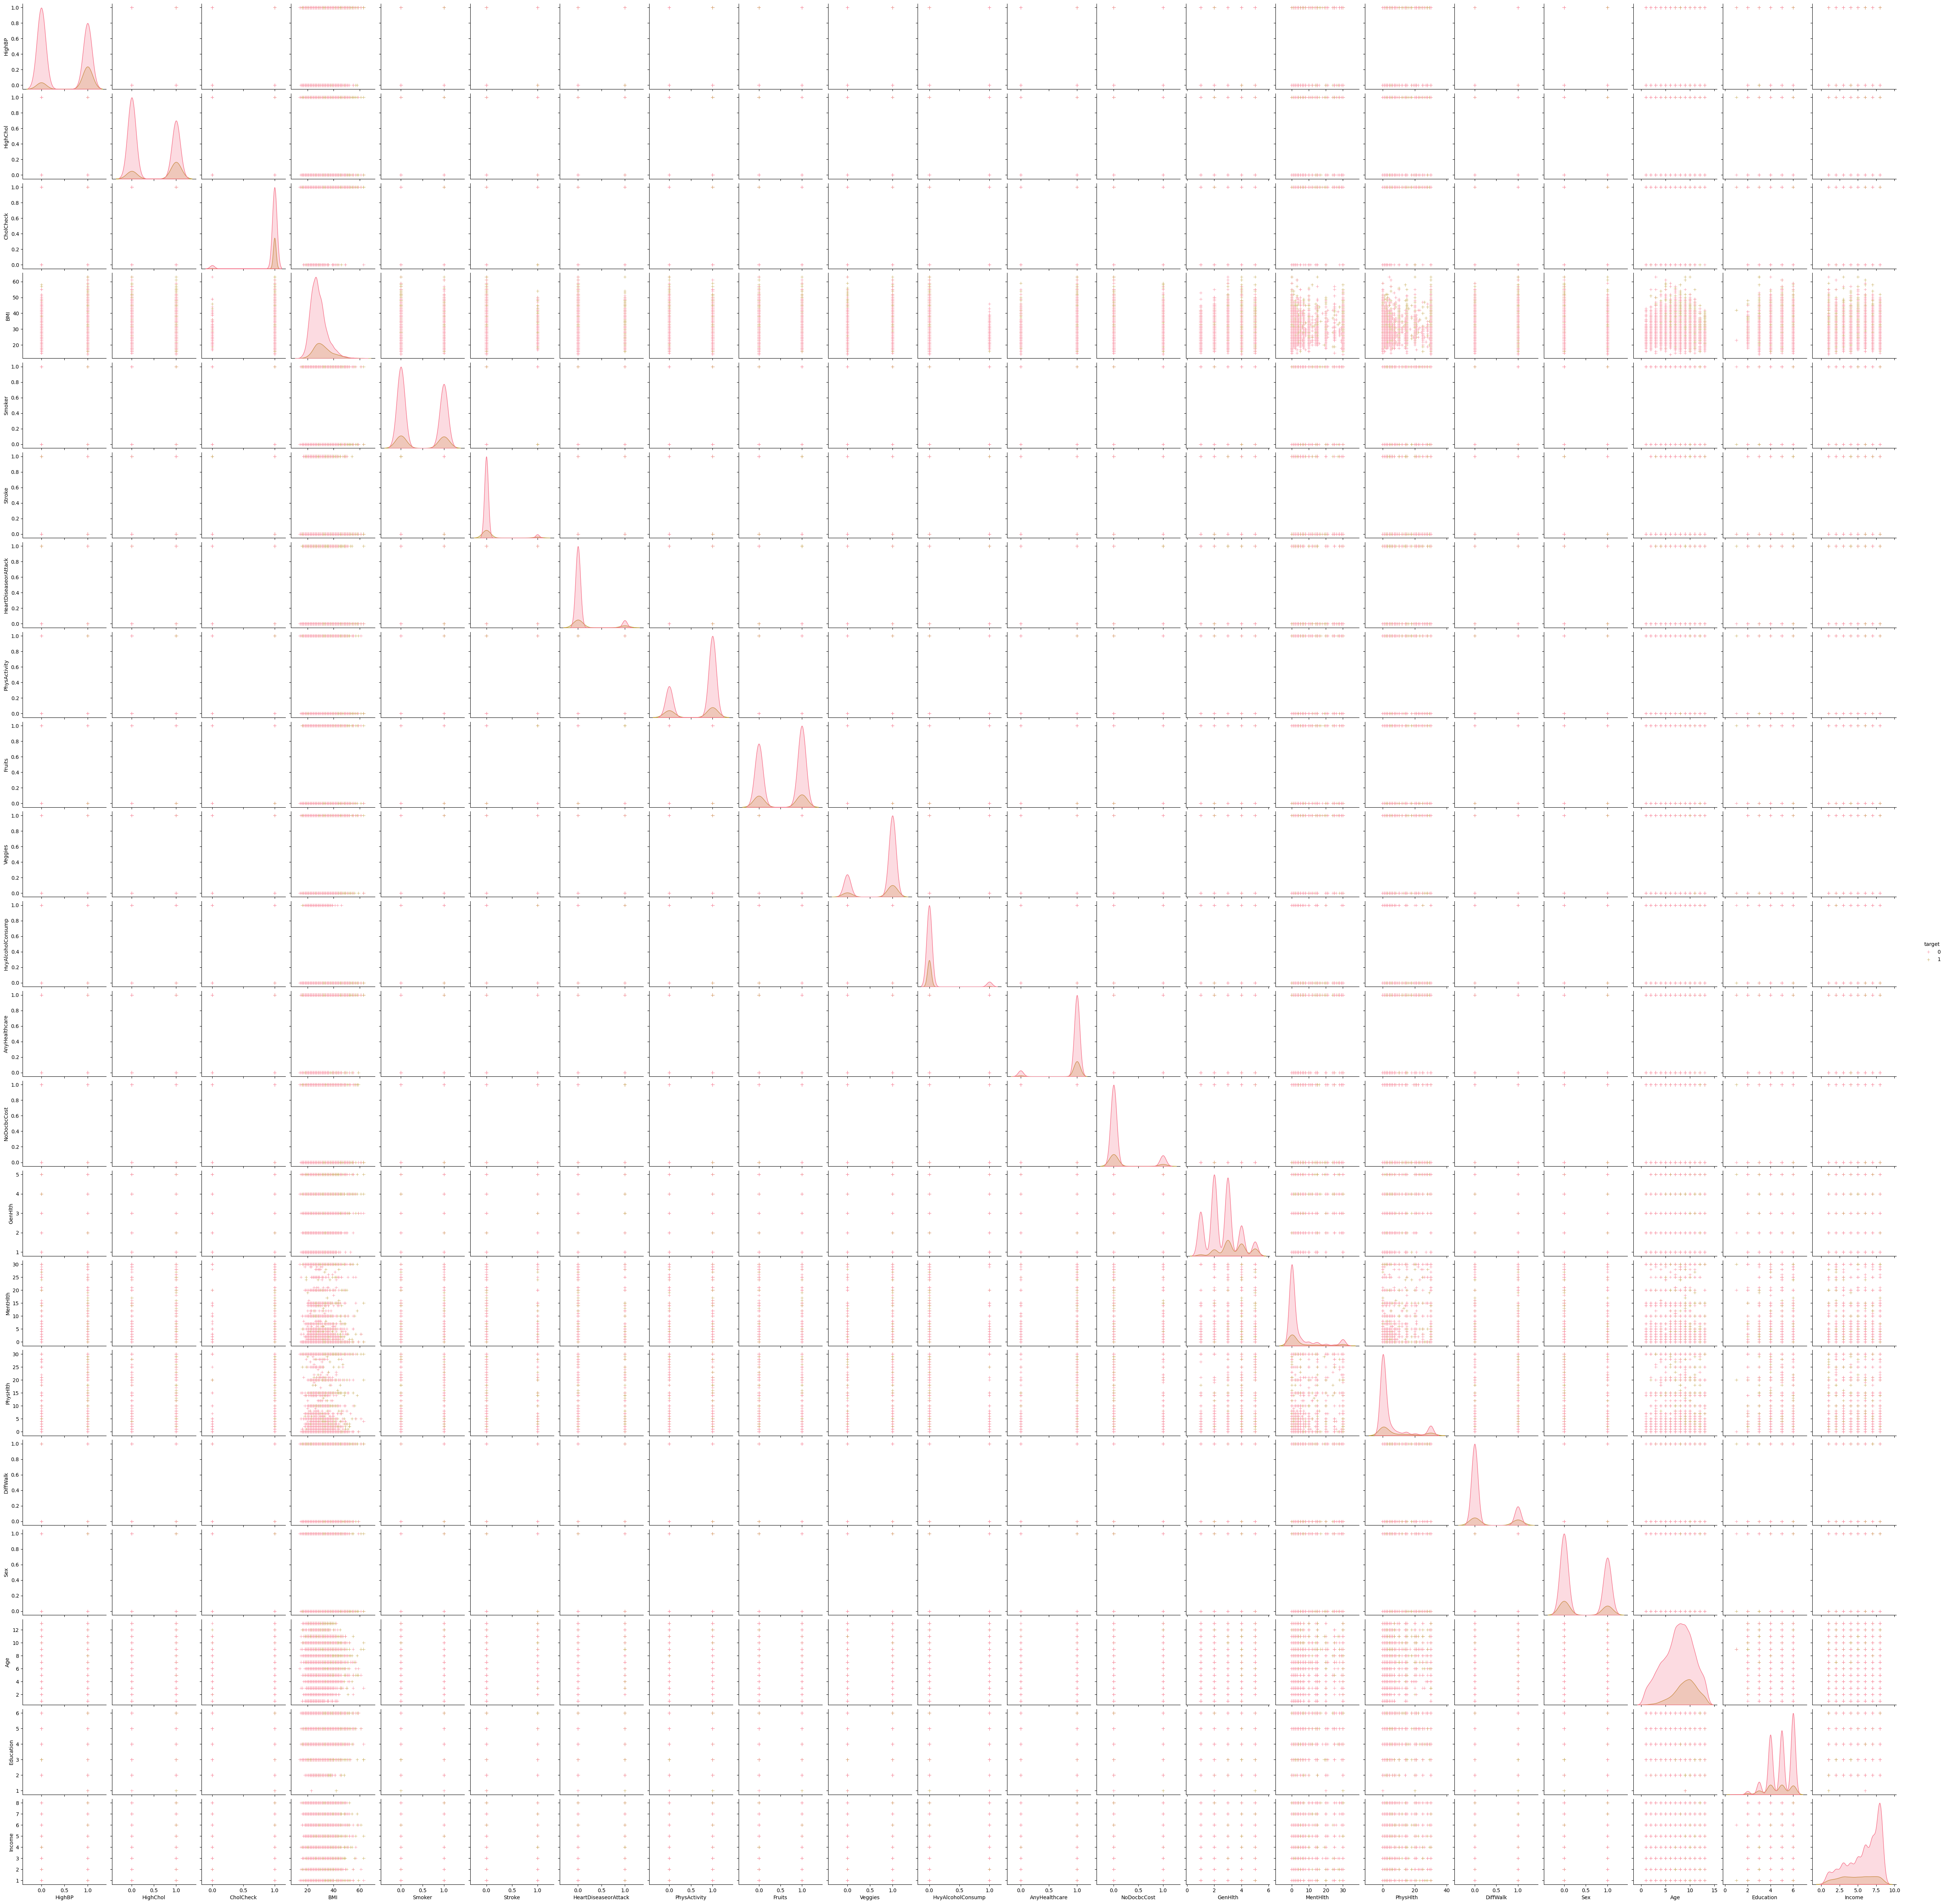

In [13]:
sns.pairplot(df, hue='target', markers='+')
plt.show()

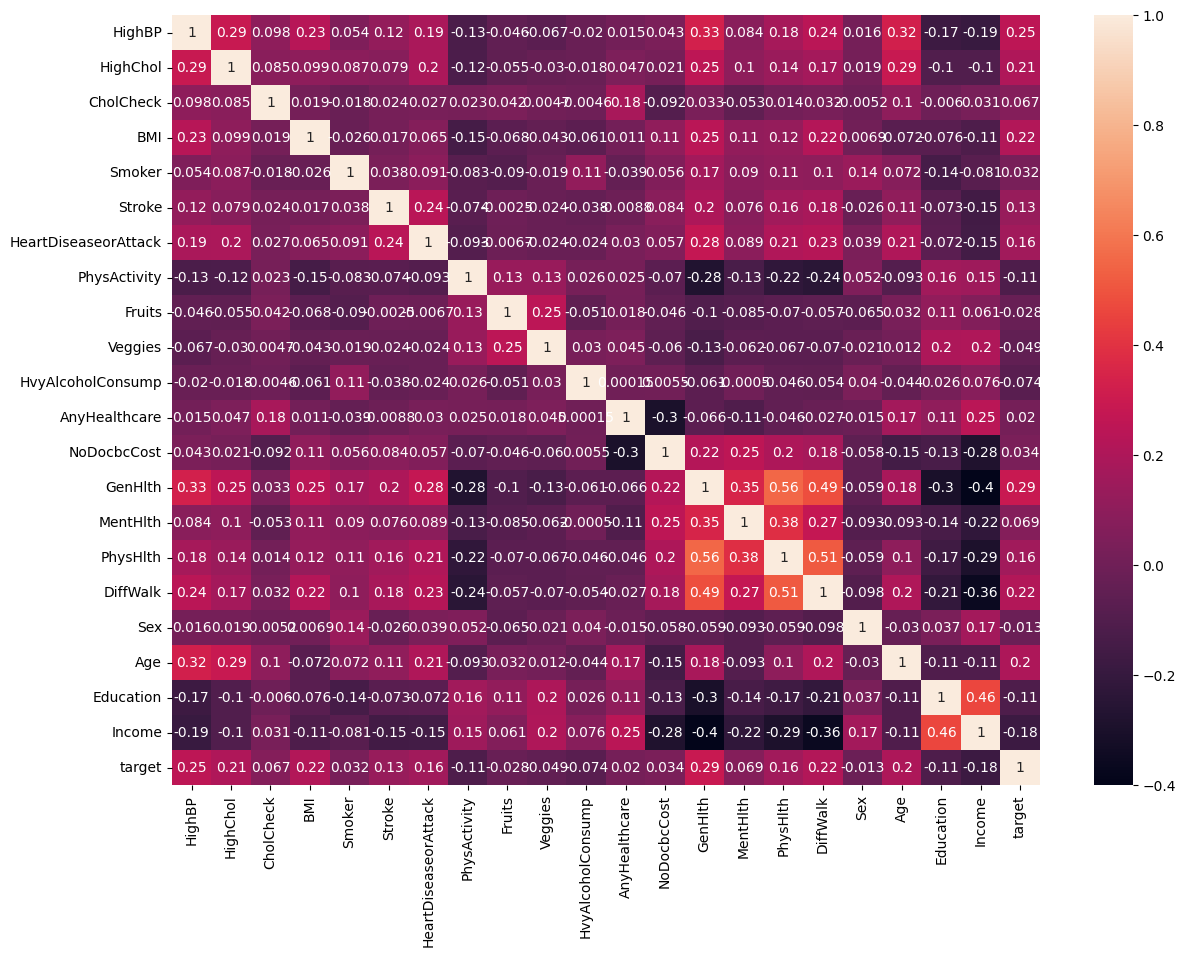

In [14]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(numeric_only = True), annot=True)
plt.show()

По тепловой карте можно сделать вывод что параметров оказывающих особенно сильное влияние на результат в датасете нет.

##Построение модели##

###Разделение датасета###

In [15]:
X = df.drop(['target'], axis=1)
y = df['target']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (5000, 21) | y shape: (5000,) 


###Разделение на обучающую выборку и тестовую###

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=15, stratify=y)

stats.ttest_ind (a=y_train, b=y_test)

TtestResult(statistic=-0.01829135445705485, pvalue=0.9854071545733398, df=4998.0)

###Обучение и выбор подходящей модели###
Далее попробуем следующие алгоритмы:

Logistic Regression (LR)  
Linear Discriminant Analysis (LDA)  
K-Nearest Neighbors (KNN)  
Classification and Regression Trees (CART)  
Gaussian Naive Bayes (NB)  
Support Vector Machines (SVM)  

In [17]:
# создаем лист для тех моделей, которые будем изучать
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))

# оцениваем их метрики
results = []
model_names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  model_names.append(name)
  print('%s \n  mean = %f \n  std = %f \n' % (name, cv_results.mean(), cv_results.std()))

LR 
  mean = 0.818500 
  std = 0.008529 

LDA 
  mean = 0.821750 
  std = 0.010957 

KNN 
  mean = 0.793500 
  std = 0.014327 

CART 
  mean = 0.724000 
  std = 0.015977 

NB 
  mean = 0.728000 
  std = 0.018500 

SVC 
  mean = 0.810750 
  std = 0.006129 



Лучшими моделями оказались: Logistic Regression и Linear Discrimination Analysis.  
Далее будем работать с моделью Linear Discrimination Analysis.

In [25]:
sk_lda = LinearDiscriminantAnalysis(solver='eigen')
sk_lda.fit(X_train, y_train)
sk_lda_pred_res = sk_lda.predict(X_test)
sk_transformed = sk_lda.transform(X_train)
sk_lda_accuracy = accuracy_score(y_test, sk_lda_pred_res)

print(f'sk LDA accuracy: {sk_lda_accuracy}')
print(f'sk LDA prediction: {sk_lda_pred_res}')
print('sk transformed features', sk_transformed[:5].T, sep='\n')

sk LDA accuracy: 0.818
sk LDA prediction: [0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0

###Визуализация решения###

<Axes: title={'center': 'LDA surface with original features'}>

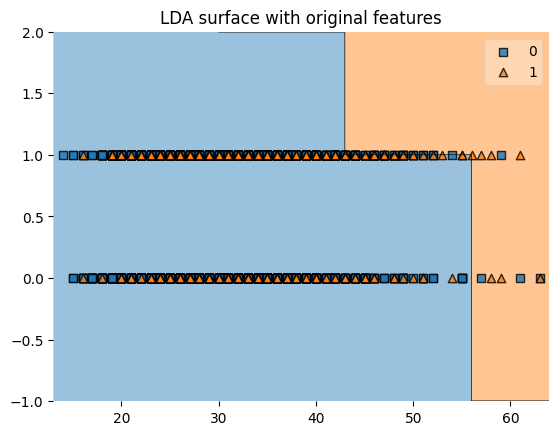

In [26]:
from mlxtend.plotting import plot_decision_regions

# Создадим целевой вектор y_2d
# Преобразуем классы к классам 0, 1, 2 соответственно
#y_s = y_train.map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
y_s = y_train
X_2d= X_train[['BMI',	'HighChol']].values

y_2d = y_s.values


sk_lda1 = LinearDiscriminantAnalysis(solver='eigen')
sk_lda1.fit(X_2d, y_2d)

plt.title('LDA surface with original features')
plot_decision_regions(
    	X=X_2d,
    	y=y_2d,
    	clf=sk_lda1)

<Axes: title={'center': 'LDA surface with transformed features'}>

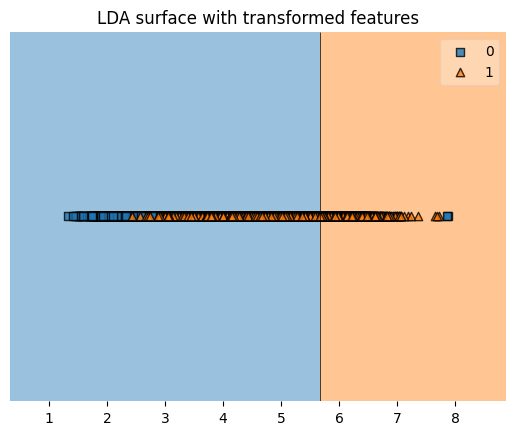

In [27]:
Xs = df[['BMI',	'HighChol']]
ys = df["target"].values

sk_lda2 = LinearDiscriminantAnalysis(solver='eigen')
X1_lda = sk_lda2.fit(X, ys).transform(X)

Xs = X1_lda

X1_lda_train, X1_lda_test, y1_train, y1_test = train_test_split(X1_lda, ys, random_state=0)

sk_lda2.fit(X1_lda_train, y1_train)

plt.title('LDA surface with transformed features')
plot_decision_regions(X=X1_lda, y=ys, clf=sk_lda2)

In [28]:
predicted = sk_lda2.predict(X1_lda_test)

In [29]:
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

## Accuray e AUC
'''
Теперь смотрим метрики.
НА ТЕСТОВОМ ДАТАСЕТЕ
'''
accuracy = metrics.accuracy_score(y1_test, predicted) # Оценим точность классификации.

'''
Получим результат
'''

## Precision e Recall
recall = metrics.recall_score(y1_test, predicted, average="weighted")
precision = metrics.precision_score(y1_test, predicted, average="weighted")
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(y1_test, predicted, target_names=[str(i) for i in np.unique(y_test)]))

Recall (all 1s predicted right): 0.83
Precision (confidence when predicting a 1): 0.79
Detail:
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1045
           1       0.48      0.16      0.24       205

    accuracy                           0.83      1250
   macro avg       0.67      0.56      0.57      1250
weighted avg       0.79      0.83      0.80      1250

